In [7]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
def gen_sample(n, mus, sigmas):
    return np.array([mus + stats.norm.rvs(size = n, loc = 0, scale = sigmas[i]) for i in np.arange(len(sigmas)) ])

def gen_mus_sigma(nb_stateux, nb_samples):
    return (stats.uniform.rvs(size=nb_samples, loc=0, scale=200), stats.uniform.rvs(size=nb_stateux, loc=0, scale=40))

nb_stateux = 7
sample_length = 10

(mus, sigma) = gen_mus_sigma(nb_stateux, sample_length)
sample = gen_sample(sample_length, mus, sigma)
print len(sample), len(sample[0])
print mus
print sigma
print sample
print [np.mean([sample[i, j] for i in np.arange(len(sigma))]) for j in np.arange(len(mus))]


7 10
[  18.80307253  179.5628036     2.37542792  138.42494617   27.04958283
   11.16202959   34.13907059   96.95954748   34.31648309  105.5234277 ]
[ 29.09066894  14.71345599   5.28672903  22.58652629  17.84811769
   7.19322701   9.38702934]
[[  1.29127824e+01   1.63219069e+02   1.80838451e+01   1.30847211e+02
    4.16122063e+01  -4.57354427e+01  -1.57032416e+01   1.39858475e+02
    5.95971275e+01   1.13480006e+02]
 [  3.22829407e+01   1.80020246e+02  -1.53870579e+01   1.28328753e+02
    3.49259026e+01   1.78190621e+01   5.46445417e+01   9.05689692e+01
    5.81235272e+01   9.84085391e+01]
 [  1.79369440e+01   1.84152698e+02  -1.28432811e+00   1.36267382e+02
    2.66210682e+01   5.69570285e+00   2.88462547e+01   9.54672737e+01
    3.96172816e+01   1.02889571e+02]
 [  7.03899125e-02   1.92488192e+02  -3.16558670e+01   9.61809825e+01
    4.68245059e+01   1.99289284e+01  -2.39248821e+00   8.85895893e+01
    6.06227174e+00   8.60853446e+01]
 [  1.43698524e+01   1.49722631e+02  -3.66637036e+

In [3]:
#v_mus = np.array([pm.Uniform("mu%d" % i, lower=0, upper=200) for i in np.arange(sample_length)])
v_mus = np.array([pm.Normal("mu%d" % i, mu=0, tau=0.001) for i in np.arange(sample_length)])
v_sigmas = [pm.Uniform("sigma%d" % k, lower=0, upper=40) for k in np.arange(nb_stateux)]
v_taus = [pm.Lambda("tau%d" % k, lambda sigma=v_sigmas[k]: 1/sigma**2) for k in np.arange(nb_stateux)]

x = np.array([[pm.Normal("x%d_%d" % (k,i), mu=v_mus[i], tau=v_taus[k], 
                         observed=True, value=np.array(sample[k,i])) for i in np.arange(sample_length)]
              for k in np.arange(nb_stateux)])

print x.shape

(7, 10)


In [4]:
mcmc = pm.MCMC([v_mus, v_sigmas, v_taus, x])
mcmc.sample(20000,4000)

 [-----------------100%-----------------] 20000 of 20000 complete in 28.2 sec

52.9632086617
45.6216450301
118.806358399
104.812708895
113.948024967
149.270307874
157.083544909
150.38448454
69.5783852921
81.4042799835
[52.963208661715697, 45.621645030117769, 118.8063583994594, 104.81270889544484, 113.94802496665771, 149.27030787360147, 157.08354490886282, 150.38448454046562, 69.578385292128218, 81.40427998353745]


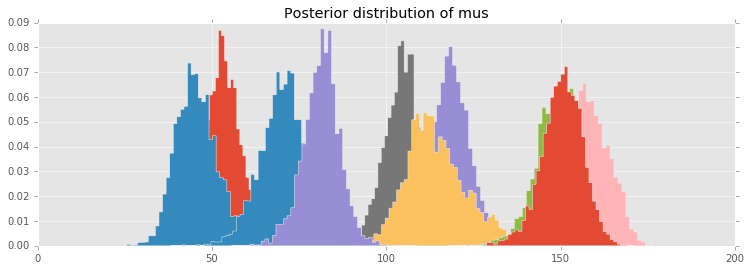

In [9]:
figsize(12.5, 4)
plt.title("Posterior distribution of mus")
for i in np.arange(sample_length):
    plt.hist(mcmc.trace("mu%d" % i)[:], bins=50, histtype="stepfilled", normed=True)
    plt.legend()
    plt.xlim((0,200))
    print (mcmc.trace("mu%d" % i)[:].mean())

print [mcmc.trace("mu%d" % j)[:].mean() for j in np.arange(sample_length)]

In [6]:
x = np.array([[1,2], [1,3], [1,4]])
print x
y = np.array([10, 20, 30])
print y
print x+y.reshape(len(y), 1)
print type(x), len(x), x.shape

[[1 2]
 [1 3]
 [1 4]]
[10 20 30]
[[11 12]
 [21 23]
 [31 34]]
<type 'numpy.ndarray'> 3 (3, 2)
